In [1]:
import numpy as np
import scipy as sp
import keras
import keras.backend as K
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline

Using TensorFlow backend.


In [2]:
import os

In [3]:
os.chdir("C:\\Users\\patlo\\Downloads\\New folder")

In [4]:
cat_img = plt.imread('dogcnn.jpg') 

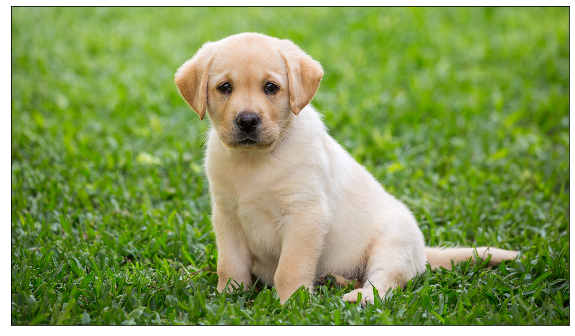

In [5]:
plt.figure(figsize=(10,20))
plt.imshow(cat_img)
plt.xticks([])
plt.yticks([])
plt.show()

In [7]:
sty = plt.imread("starry_night.jpg")

<function matplotlib.pyplot.show(*args, **kw)>

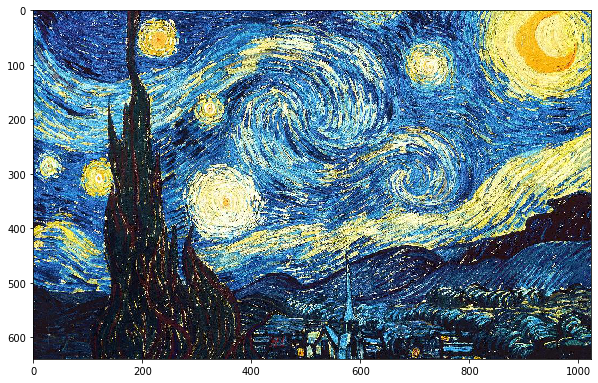

In [14]:
plt.figure(figsize=(10,20))
plt.imshow(sty)
plt.show

In [15]:
cat_img.shape

(640, 1120, 3)

In [16]:
sty.shape

(640, 1024, 3)

In [17]:
TARGET_SIZE = cat_img.shape[:2]

In [18]:
TARGET_SIZE

(640, 1120)

In [19]:
style_img1 = sp.misc.imresize(sty, TARGET_SIZE) 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  """Entry point for launching an IPython kernel.


In [20]:

def show_image(image, figsize=None, show_shape=False):
    if figsize is not None:
        plt.figure(figsize=figsize)
    if show_shape:
        plt.title(image.shape)
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [21]:
from keras.applications.vgg16 import preprocess_input
def preprocess(img):
    img = img.copy()    
    img = img.astype('float64')
    img = np.expand_dims(img, axis=0)
    return preprocess_input(img)

In [33]:
style_img1

array([[[ 11,  24,  77],
        [  7,  18,  74],
        [ 72,  82, 141],
        ...,
        [215, 221,  67],
        [241, 245, 109],
        [181, 184,  67]],

       [[ 40,  61, 118],
        [  7,  26,  85],
        [ 41,  57, 117],
        ...,
        [198, 189,  63],
        [227, 217,  94],
        [239, 227, 107]],

       [[ 31,  65, 128],
        [  8,  40, 104],
        [ 14,  42, 109],
        ...,
        [225, 198, 102],
        [177, 149,  41],
        [255, 243, 120]],

       ...,

       [[ 35,  19,  30],
        [ 35,  19,  30],
        [ 34,  18,  29],
        ...,
        [ 25,  20,  26],
        [ 25,  20,  26],
        [ 25,  20,  26]],

       [[ 35,  17,  29],
        [ 34,  16,  28],
        [ 33,  15,  27],
        ...,
        [ 25,  20,  26],
        [ 26,  21,  27],
        [ 26,  21,  27]],

       [[ 40,  20,  31],
        [ 40,  20,  32],
        [ 37,  18,  30],
        ...,
        [ 27,  22,  28],
        [ 27,  22,  28],
        [ 27,  22,  28]]

In [26]:
r=style_img1

In [31]:
preprocess(r)

array([[[[-2.69390e+01, -9.27790e+01, -1.12680e+02],
         [-2.99390e+01, -9.87790e+01, -1.16680e+02],
         [ 3.70610e+01, -3.47790e+01, -5.16800e+01],
         ...,
         [-3.69390e+01,  1.04221e+02,  9.13200e+01],
         [ 5.06100e+00,  1.28221e+02,  1.17320e+02],
         [-3.69390e+01,  6.72210e+01,  5.73200e+01]],

        [[ 1.40610e+01, -5.57790e+01, -8.36800e+01],
         [-1.89390e+01, -9.07790e+01, -1.16680e+02],
         [ 1.30610e+01, -5.97790e+01, -8.26800e+01],
         ...,
         [-4.09390e+01,  7.22210e+01,  7.43200e+01],
         [-9.93900e+00,  1.00221e+02,  1.03320e+02],
         [ 3.06100e+00,  1.10221e+02,  1.15320e+02]],

        [[ 2.40610e+01, -5.17790e+01, -9.26800e+01],
         [ 6.10000e-02, -7.67790e+01, -1.15680e+02],
         [ 5.06100e+00, -7.47790e+01, -1.09680e+02],
         ...,
         [-1.93900e+00,  8.12210e+01,  1.01320e+02],
         [-6.29390e+01,  3.22210e+01,  5.33200e+01],
         [ 1.60610e+01,  1.26221e+02,  1.31320e+02]],

In [34]:
def make_inputs(content_img, style_img):
    content_input   = K.constant(preprocess(content_img))
    style_input     = K.constant(preprocess(style_img))
    generated_input = K.placeholder(content_input.shape)  
    return content_input, style_input, generated_input

In [35]:
content_input, style_input, generated_input = make_inputs(
    cat_img, style_img1)
input_tensor = K.concatenate(
    [content_input, style_input, generated_input], axis=0)

In [37]:
from keras.applications.vgg19 import VGG19

In [25]:
from keras.applications.vgg16 import VGG16
model = VGG16(input_tensor=input_tensor, 
              include_top=False)

58892288/58889256 [==============================] - ETA:  - ETA: 11:3 - ETA: 8:0 - ETA: 4: - ETA: 3: - ETA: 3: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1

In [26]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [27]:
def calc_content_loss(layer_dict, content_layer_names):
    loss = 0
    for name in content_layer_names:
        layer = layer_dict[name]
        content_features   = layer.output[0, :, :, :]  
        generated_features = layer.output[2, :, :, :]  
        loss += K.sum(K.square(
            generated_features - content_features)) 
    return loss / len(content_layer_names)

In [28]:
layer_dict = {layer.name:layer for layer in model.layers}
content_loss = calc_content_loss(layer_dict, ['block5_conv2'])

In [29]:
def gram_matrix(x):    
    features = K.batch_flatten(K.permute_dimensions(x, (2, 0, 1))) 
    gram = K.dot(features, K.transpose(features)) 
    return gram

In [30]:
def get_style_loss(style_features, generated_features):
    S = gram_matrix(style_features)
    G = gram_matrix(generated_features)
    channels = 3
    size = TARGET_SIZE[0]*TARGET_SIZE[1]
    denom = (4. * (channels**2) * (size**2))
    return K.sum(K.square(S - G)) / denom

In [31]:
def calc_style_loss(layer_dict, style_layer_names):
    loss = 0
    for name in style_layer_names:
        layer = layer_dict[name]
        style_features     = layer.output[1,:,:,:] 
        generated_features = layer.output[2,:,:,:] 
        loss += get_style_loss(style_features, generated_features) 
    return loss / len(style_layer_names)

In [32]:
style_loss = calc_style_loss(
    layer_dict,
    ['block1_conv1',
     'block2_conv1',
     'block3_conv1',
     'block4_conv1', 
     'block5_conv1'])

In [33]:
def calc_variation_loss(x):
    row_diff = K.square(x[:,:-1,:-1,:] - x[:,1:  , :-1,:])
    col_diff = K.square(x[:,:-1,:-1,:] - x[:, :-1,1:  ,:])
    return K.sum(K.pow(row_diff + col_diff, 1.25))

In [34]:
variation_loss = calc_variation_loss(generated_input)

In [44]:
loss = 0.0 * content_loss + \
       1.0 * style_loss   + \
       0.0 * variation_loss
grads = K.gradients(loss, generated_input)[0]
calculate = K.function([generated_input], [loss, grads])
generated_data = preprocess(cat_img)
for i in tqdm(range(10)):
    _, grads_value = calculate([generated_data])
    generated_data -= grads_value * 0.001

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [05:29<00:00, 32.42s/it]


In [45]:
def deprocess(img):
    img = img.copy()            
    img = img[0]                   
    img[:,:,0] += 103.939     
    img[:,:,1] += 116.779
    img[:,:,2] += 123.68      
    img = img[:,:,::-1]       
    img = np.clip(img, 0, 255)  
    return img.astype('uint8') 

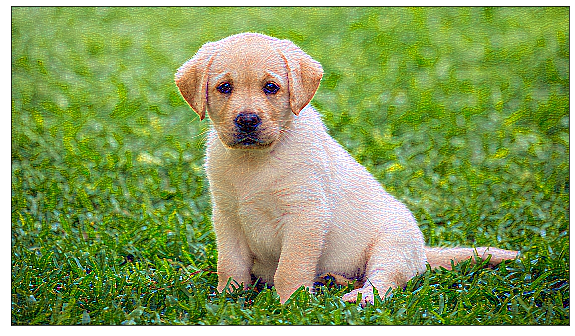

In [46]:
generated_image = deprocess(generated_data)
plt.figure(figsize=(10,20))
plt.imshow(generated_image)
plt.xticks([])
plt.yticks([])
plt.show()

In [68]:
def transfer_style(content_img, 
                   style_img,
                   content_layer_names, 
                   style_layer_names,
                   content_loss_ratio, 
                   style_loss_ratio, 
                   variation_loss_ratio,
                   start_img=None, 
                   steps=10,
                   learning_rate=0.001,
                   show_generated_image=True,
                   figsize=(10,20)):
    # clear the previous session if any
    K.clear_session()
    
    # by default start with the content image
    if start_img is None:
        start_img = content_img

    # prepare inputs and the model
    content_input, style_input, generated_input = make_inputs(content_img, style_img)
    input_tensor = K.concatenate([content_input, style_input, generated_input], axis=0)
    model = keras.applications.vgg16.VGG16(input_tensor=input_tensor, include_top=False)
    
    # calculate various loss
    layer_dict = {layer.name:layer for layer in model.layers}
    content_loss = calc_content_loss(layer_dict, content_layer_names)
    style_loss = calc_style_loss(layer_dict, style_layer_names)
    variation_loss = calc_variation_loss(generated_input)
    
    # calculate the gradients
    loss = content_loss_ratio   * content_loss   + \
           style_loss_ratio     * style_loss     + \
           variation_loss_ratio * variation_loss

    grads = K.gradients(loss, generated_input)[0]
    calculate = K.function([generated_input], [loss, grads])

    # nudge the generated image to apply the style while keeping the content
    generated_data = preprocess(start_img)
    for i in tqdm(range(steps)):
        _, grads_value = calculate([generated_data])
        generated_data -= grads_value * learning_rate
        
    # reverse the preprocessing
    generated_img = deprocess(generated_data)
    
    if show_generated_image:
        show_image(generated_img, figsize=(10,20))
        
    return generated_img

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [32:32<00:00, 19.57s/it]


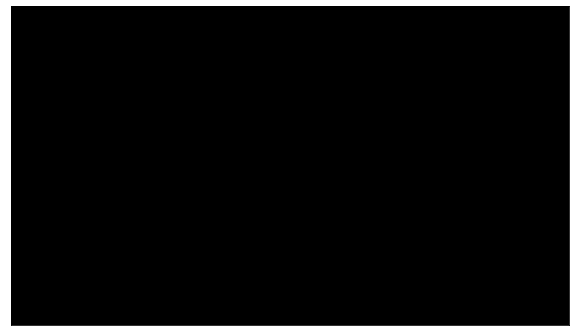

In [72]:
   transfer_style(
    cat_img, 
    style_img1,
    ['block5_conv2'], 
    ['block1_conv1',
     'block2_conv1',
     'block3_conv1',
     'block4_conv1', 
     'block5_conv1'],
    content_loss_ratio=1.0, 
    style_loss_ratio=1.0, 
    variation_loss_ratio=0.7,               
    steps=100,
    learning_rate=0.01);

In [74]:
dancing_men_img = plt.imread("yellow.jpg")

In [75]:
dancing_men_img.shape

(360, 640, 3)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  """Entry point for launching an IPython kernel.


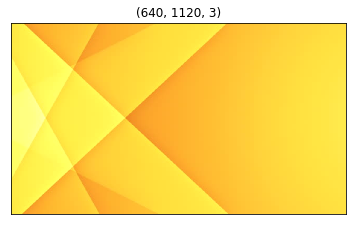

In [76]:
dancing_men_img = sp.misc.imresize(dancing_men_img, TARGET_SIZE)

show_image(dancing_men_img, show_shape=True)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [32:54<00:00, 19.03s/it]


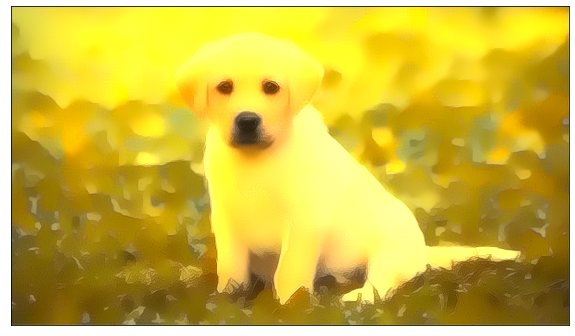

In [77]:

transfer_style(
    cat_img, 
    dancing_men_img,
    ['block5_conv1'], 
    ['block1_conv2',
     'block2_conv2',
     'block3_conv3'],
    content_loss_ratio=0.1, 
    style_loss_ratio=1.0, 
    variation_loss_ratio=0.1,
    steps=100,
    learning_rate=0.001);